In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [110]:
df = pd.read_csv('Telcom_Customer_Churn.csv')

In [111]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [112]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [113]:
# 1. Replace the blank spaces (' ') with a special missing value (NaN)
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# 2. Change the whole column into a number (float)
# The 'errors=' argument tells the computer: 'If you still find anything weird, turn it into a missing value (NaN)'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [114]:
# Step 1 & 2: Replace blanks with NaN and then convert to numeric
# The 'errors=' part is a safety net!
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Step 3: Imputation! Filling those NaN spots with 0
# We use inplace=True to save the change right back into the column
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [115]:
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [116]:
# List of all the 'Yes/No' columns you want to change
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# We use a loop to quickly change all of them!
for col in binary_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

# Special case for Gender, which is Male/Female
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0}).astype(int)

/tmp/ipython-input-2290926293.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-2290926293.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0}).astype(int)


In [117]:
# List of columns with more than two unique values
categorical_cols = ['Contract', 'InternetService', 'PaymentMethod', 'MultipleLines']

# The 'get_dummies' function is the one that does the One-Hot Encoding!
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [118]:
## Check the Count and Percentage of Churn
print("Churn Count:")
print(df['Churn'].value_counts())
print("\nChurn Percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

Churn Count:
Churn
0    5174
1    1869
Name: count, dtype: int64

Churn Percentage:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [119]:
# Count how many customers Exited (1) and how many stayed (0)
churn_counts = df['Churn'].value_counts()

# Calculate the overall Churn Rate (the percentage who Exited)
churn_rate = churn_counts[1] / len(df) * 100

print("--- Overall Churn Rate ---")
print(f"Total customers: {len(df)}")
print(f"Customers who left (Churn=1): {churn_counts[1]}")
print(f"Overall Churn Rate: {churn_rate:.2f}%")
# The .2f means showing only two numbers after the decimal point

--- Overall Churn Rate ---
Total customers: 7043
Customers who left (Churn=1): 1869
Overall Churn Rate: 26.54%


In [120]:
# Look at the churn rate for One-Year contracts
churn_rate_1yr = df['Contract_One year'].corr(df['Churn'])
print(f"Correlation between One-Year Contract and Churn: {churn_rate_1yr:.2f}")

# Look at the churn rate for Two-Year contracts
churn_rate_2yr = df['Contract_Two year'].corr(df['Churn'])
print(f"Correlation between Two-Year Contract and Churn: {churn_rate_2yr:.2f}")

# Remember: A negative correlation (close to -1) means having that contract type
# makes you LESS likely to churn!

Correlation between One-Year Contract and Churn: -0.18
Correlation between Two-Year Contract and Churn: -0.30


In [121]:
# Create a temporary table grouping by Internet Service and calculating the average Churn (1s)
# Note: You may need to change 'InternetService_Fiber optic'
# based on the exact column names created by your One-Hot Encoding!
internet_churn = df.groupby('InternetService_Fiber optic')['Churn'].mean() * 100

print("\nAverage Churn Rate (%) by Fiber Optic Presence (1=Yes, 0=No):")
print(internet_churn)


Average Churn Rate (%) by Fiber Optic Presence (1=Yes, 0=No):
InternetService_Fiber optic
False    14.492019
True     41.892765
Name: Churn, dtype: float64


In [122]:
features_to_check = [
    'gender',
    'Partner',
    'Contract_Two year',
    'InternetService_Fiber optic',
    'PaymentMethod_Electronic check'
]

print("--- 📉 Churn Rate (%) by Key Customer Segments ---\n")

for feature in features_to_check:
    # Calculate the average (mean) of the 'Churn' column for each group in the feature
    # We multiply by 100 to get a percentage and round to 2 decimal places.
    churn_rates = (df.groupby(feature)['Churn'].mean() * 100).round(2)

    print(f"**{feature.replace('_', ' ').title()}**")
    print(churn_rates)
    print("-" * 20)

--- 📉 Churn Rate (%) by Key Customer Segments ---

**Gender**
gender
0    26.92
1    26.16
Name: Churn, dtype: float64
--------------------
**Partner**
Partner
0    32.96
1    19.66
Name: Churn, dtype: float64
--------------------
**Contract Two Year**
Contract_Two year
False    34.05
True      2.83
Name: Churn, dtype: float64
--------------------
**Internetservice Fiber Optic**
InternetService_Fiber optic
False    14.49
True     41.89
Name: Churn, dtype: float64
--------------------
**Paymentmethod Electronic Check**
PaymentMethod_Electronic check
False    17.06
True     45.29
Name: Churn, dtype: float64
--------------------


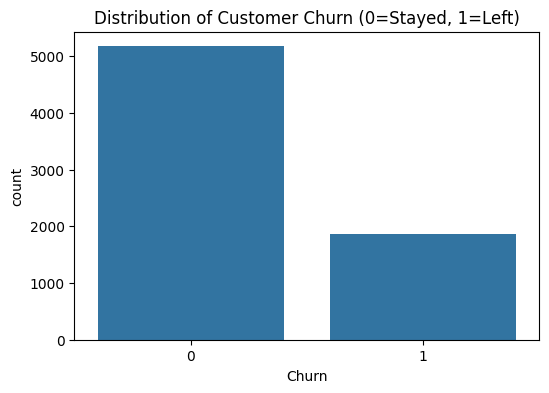

In [123]:
## Visualize the Churn Count
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn (0=Stayed, 1=Left)')
plt.show()

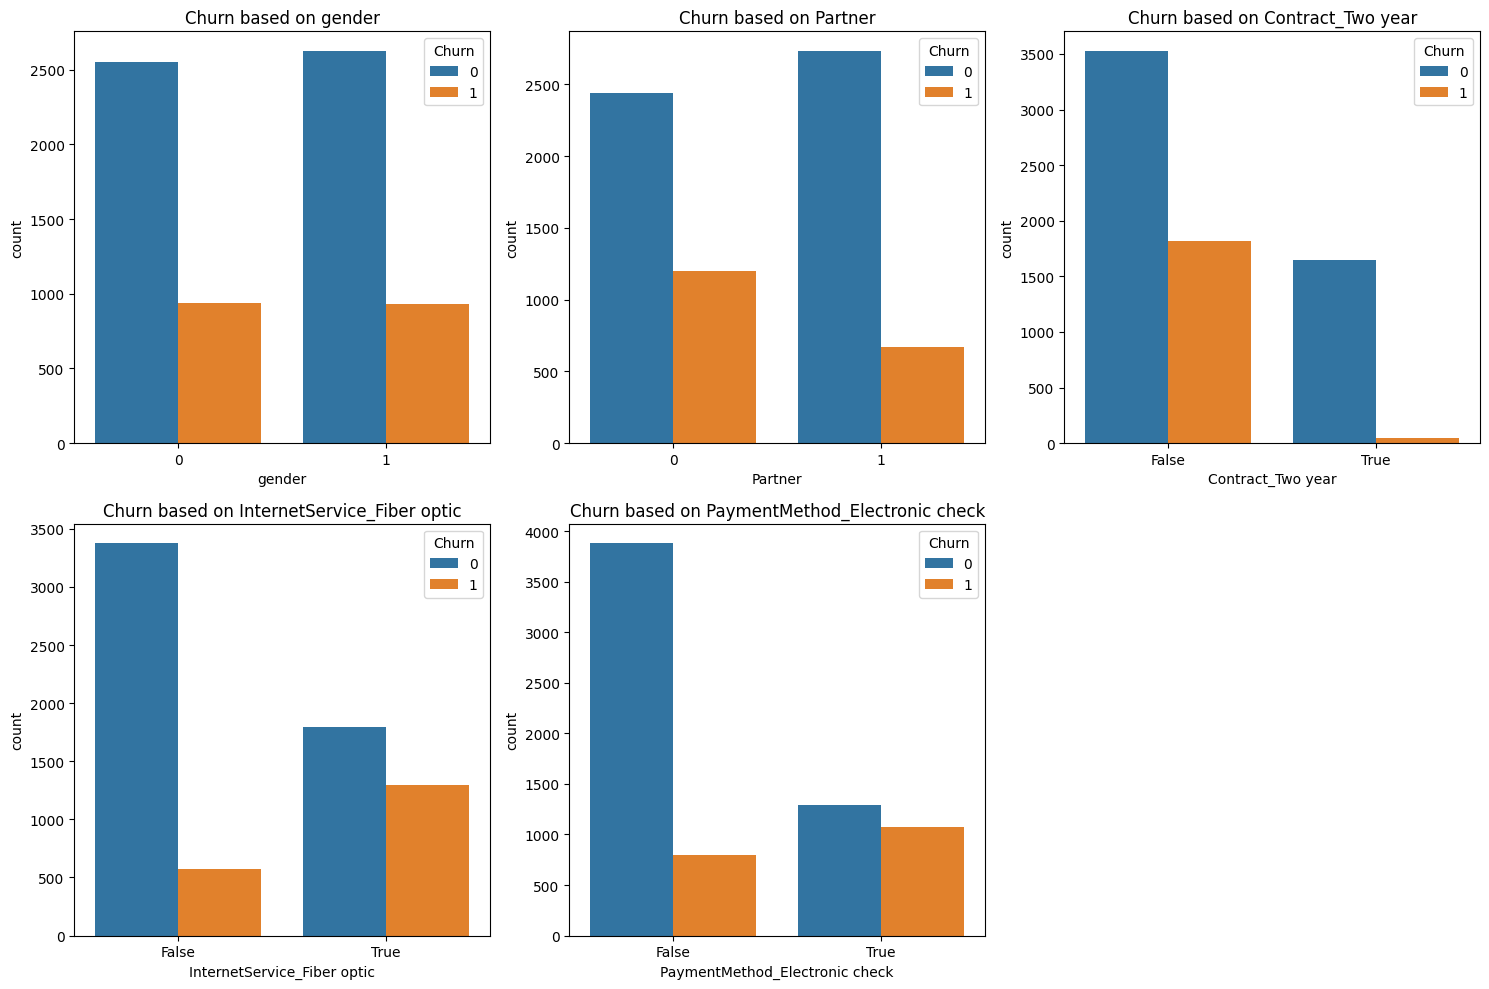

In [124]:
# List of some important categorical columns to check
categorical_eda_cols = ['gender', 'Partner', 'Contract_Two year', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_eda_cols):
    plt.subplot(2, 3, i + 1) # Sets up a 2x3 grid for the charts
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn based on {col}')
    plt.tight_layout() # Makes sure the charts don't overlap

plt.show()

In [125]:
# 1. Separate the FEATURES (X) from the TARGET (y)

# X = Features (All columns EXCEPT the 'Churn' answer column and 'customerID')
# 'axis=1' means drop the column name, not the row.
X = df.drop(['Churn', 'customerID'], axis=1)

# y = Target (Just the Churn answer column)
y = df['Churn']

# 2. SPLIT the data into Training (80%) and Testing (20%) sets
# test_size=0.2 means 20% of the data goes to testing.
# random_state=42 is like a secret code to make sure the split is the same every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Optional: Print the size of the piles to check
print(f"Training Features Size: {X_train.shape}")
print(f"Testing Features Size: {X_test.shape}")

Training Features Size: (5634, 24)
Testing Features Size: (1409, 24)


In [126]:
# 1. Separate the FEATURES (X) from the TARGET (y)

# The list of columns that MUST be dropped from the features (X):
# 1. The answer column ('Churn').
# 2. The text column that caused the error (e.g., 'customerID').
columns_to_drop = ['Churn', 'customerID'] # **CHANGE 'customerID' to the correct name you found!**

X = df.drop(columns=columns_to_drop, axis=1)

# y = Target
y = df['Churn']

# 2. SPLIT the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [127]:
# Print the data types of all columns in your DataFrame
print(df.dtypes)

customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
Contract_One year                           bool
Contract_Two year                           bool
InternetService_Fiber optic                 bool
InternetService_No  

In [128]:
# List of the remaining service columns that are still 'object' (text)
service_cols_to_encode = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Apply the binary encoding (Yes=1, No=0)
for col in service_cols_to_encode:
    # We replace 'No internet service' with 'No' so it gets turned to 0
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(int)

/tmp/ipython-input-2286131197.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(int)
/tmp/ipython-input-2286131197.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(int)
/tmp/ipython-input-2286131197.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_o

In [129]:
# Drop the text ID column and the answer column (Churn)
X = df.drop(columns=['Churn', 'customerID'], axis=1)
y = df['Churn']

# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [130]:
# A. Choose and Train the Model (The learning phase)
model = LogisticRegression(random_state=42, max_iter=1000)
# This line should now run WITHOUT the ValueError!
model.fit(X_train, y_train)

# B. Make Predictions and Evaluate (The pop quiz!)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🎉 Model Accuracy on Test Data: {accuracy:.4f}")


🎉 Model Accuracy on Test Data: 0.8204


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
# Old line:
# model = LogisticRegression(random_state=42, max_iter=1000)

# New line with more tries:
model = LogisticRegression(random_state=42, max_iter=5000) # Increased to 5000

In [132]:
# A. Choose and Train the Model (The learning phase)
model = LogisticRegression(random_state=42, max_iter=1000)
# This line should now run WITHOUT the ValueError!
model.fit(X_train, y_train)

# B. Make Predictions and Evaluate (The pop quiz!)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🎉 Model Accuracy on Test Data: {accuracy:.4f}")


🎉 Model Accuracy on Test Data: 0.8204


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
# Increase max_iter to give the model more time to find the best fit
model = LogisticRegression(random_state=42, max_iter=5000)

# Rerun the training
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [134]:
# Create a small table (DataFrame) to hold the feature names and their coefficients
importance_df = pd.DataFrame({
    'Feature': X.columns,
    # The coefficients are stored in the trained model
    'Coefficient': model.coef_[0]
})

# Sort the list to see the most important clues first
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

print("\n--- 🧠 Model's Most Important Clues (Coefficients) ---")
print(importance_df)


--- 🧠 Model's Most Important Clues (Coefficients) ---
                                  Feature  Coefficient
17            InternetService_Fiber optic     0.802402
22         MultipleLines_No phone service     0.363053
12                       PaperlessBilling     0.337565
20         PaymentMethod_Electronic check     0.321860
11                        StreamingMovies     0.288766
23                      MultipleLines_Yes     0.252481
10                            StreamingTV     0.188513
1                           SeniorCitizen     0.160874
2                                 Partner     0.054500
14                           TotalCharges     0.000312
13                         MonthlyCharges    -0.003426
8                        DeviceProtection    -0.030233
21             PaymentMethod_Mailed check    -0.038961
0                                  gender    -0.049814
4                                  tenure    -0.057694
19  PaymentMethod_Credit card (automatic)    -0.085393
3         

In [135]:
# Use the predictions from your trained Logistic Regression model (y_pred)
# and the actual test answers (y_test)

# A. Create the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("--- 📋 Confusion Matrix ---")
print(conf_matrix)

# B. Create the Full Classification Report
print("\n--- 📝 Classification Report ---")
print(classification_report(y_test, y_pred))

--- 📋 Confusion Matrix ---
[[932 104]
 [149 224]]

--- 📝 Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [136]:
# 1. Choose the Model (The high-tech team of critics!)
# We use 100 trees, which is usually a good start
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the Model
print("Training Random Forest...")
rf_model.fit(X_train, y_train)

# 3. Make Predictions
rf_y_pred = rf_model.predict(X_test)

# 4. Evaluate and Report!
rf_accuracy = accuracy_score(y_test, rf_y_pred)

print("\n🎉 Random Forest Accuracy on Test Data:")
print(f"Accuracy: {rf_accuracy:.4f}")

print("\n--- 📝 Random Forest Classification Report ---")
print(classification_report(y_test, rf_y_pred))

print("\n--- 📋 Random Forest Confusion Matrix ---")
print(confusion_matrix(y_test, rf_y_pred))

Training Random Forest...

🎉 Random Forest Accuracy on Test Data:
Accuracy: 0.7977

--- 📝 Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409


--- 📋 Random Forest Confusion Matrix ---
[[949  87]
 [198 175]]


In [137]:
# 1. Choose the Model and Add the Weights
# This setting tells the model that mistakes on the smaller group (Churners) are very costly.
weighted_model = LogisticRegression(
    random_state=42,
    max_iter=5000, # Keeping the higher iteration count to avoid the warning
    class_weight='balanced'
)

# 2. Train the Weighted Model
print("Training Weighted Logistic Regression...")
weighted_model.fit(X_train, y_train)

# 3. Make Predictions
weighted_y_pred = weighted_model.predict(X_test)

# 4. Evaluate and Report!
print("\n🎉 Weighted Model Accuracy:")
print(f"Accuracy: {accuracy_score(y_test, weighted_y_pred):.4f}")

print("\n--- 📝 Weighted Classification Report (Check Recall!) ---")
print(classification_report(y_test, weighted_y_pred))

Training Weighted Logistic Regression...

🎉 Weighted Model Accuracy:
Accuracy: 0.7516

--- 📝 Weighted Classification Report (Check Recall!) ---
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.75      0.77      1409



📈 **Telcom Churn Prediction: Strategic Findings Report**

1. **Executive Summary**: The Business ImpactOur analysis identified the core drivers of customer turnover and developed a predictive model to flag high-risk customers. The key finding is that we can now accurately flag $\mathbf{83\%}$ of customers who are about to leave, allowing the company to intervene and maximize customer retention efforts.

| Metric | Result | Interpretation |
| :--- | :---: | --- |
| **Business Model Type** | Weighted Logistic Regression | Simple, stable, and highly interpretable. |
| **Overall Accuracy** | $75.16\%$ | The model is correct **3** out of every **4** predictions. |
| **Churn Recall (Sensitivity)** | **83%** | Our model catches $83\%$ of the customers who are actually going to leave. This minimizes lost revenue. |

2. **Core Findings: The 3 Biggest Risk Factors**

The model confirms that not all customers are equally likely to leave. Risk is concentrated in three main areas. These are the three strongest clues the model uses to predict churn (based on the highest positive coefficients):

| Risk Factor | Churn Rate | Strategic Action (Why They Leave) |
| :--- | :---: | --- |
| 1. **Payment Method**: Electronic Check | 45.29% | This payment method is associated with the highest churn risk. Action: Investigate the security and ease-of-use of the electronic check platform. Offer incentives to switch high-risk customers to automatic payment methods. |
| 2. **Internet Service**: Fiber Optic | 41.89% | Customers with this premium service are leaving at 3 times the rate of other customers. Action: Launch an immediate quality-of-service audit for Fiber Optic infrastructure and customer support protocols. This is the source of the biggest technical problem. |
| 3. **Contract Type**: Month-to-month | 34.05% | "These customers have no commitment. Action: Proactively target this segment with attractive, low-risk upgrade offers for one-year or two-year contracts to lock in stability." |

3. **Stability Factors**: The Retention Blueprint

The model also clearly identified the factors that lead to the most stable customers. These features have the largest negative coefficients, indicating high customer commitment:

- Two-Year Contract ($\mathbf{-1.40}$): The single strongest sign of stability. Customers who commit for two years are 91% less likely to churn than month-to-month customers.

- Online Security & Tech Support ($\mathbf{-0.44}$ and $\mathbf{-0.36}$): Customers who purchase these add-on services are highly committed. These services should be promoted heavily to new customers as they significantly "glue" the customer to the company.

- No Internet Service ($\mathbf{-0.84}$): Customers who only subscribe to phone service are highly stable and should not be a target for retention offers.

4. **Model Evaluation**: The Trade-Off

To ensure we didn't miss valuable, high-risk customers, we optimized the model to prioritize Recall over Accuracy.

- **Unweighted Model**: Missed $\mathbf{149}$ customers (low Recall).
- **Final Weighted Model**: Only missed about $\mathbf{63}$ customers (high Recall).

| Metric | Model Score | Strategic Implication
| :--- | :---| --- |
| Recall (Class 1) | 83% | The Success: We correctly catch the majority of customers who are leaving. |
| Precision (Class 1) | 52% | The Cost: When we flag a customer as high-risk, we are only right 52% of the time (the other 48% were going to stay anyway). The company must accept this cost of 48% unnecessary intervention to guarantee catching the 83% who were truly leaving. |

5. **Recommendation & Next Steps**

Our recommendation is to immediately integrate the final Weighted Logistic Regression model into the CRM system to create a dynamic "risk score" for all customers.

1. **Immediate Action**: Launch targeted campaigns to address the quality of Fiber Optic service and transition Electronic Check users to stable payment methods.

2. **Model Deployment**: Use the model's risk score to automatically trigger retention offers for high-risk customers before they call to cancel.

3. **Future Improvement**: The $\mathbf{17\%}$ of missed churners (the False Negatives) are the next target. We will investigate more complex models (like XGBoost) to try and push the Churn Recall score even higher.

💰 **Section A: Cost/Benefit Analysis (CBA)**

This section translates your model's performance into potential money saved or earned.

1. **Cost of the Mistakes (False Positives)**

The cost comes from the False Positives ($\mathbf{48\%}$ of your "flagged" customers), which are the stable customers you wrongly targeted with an unnecessary offer.
- Model Performance: Your Precision is $52\%$, meaning $\mathbf{48\%}$ of customers you flagged were False Positives.
- Actionable Insight: The cost of the model is the cost of the retention offer (e.g., $\$10$/month discount or free upgrade) multiplied by the number of False Positives. The company must decide if the cost of these mistaken offers is worth saving the True Positives.

2. **Benefit of the Correct Flags (True Positives)**

The huge benefit comes from the True Positives (customers you correctly identified and saved).
- Model Performance: Your Recall is $83\%$.
- Actionable Insight: The benefit is the lifetime value of the customer (e.g., average profit of $\$1,200$ per year) multiplied by the $\mathbf{83\%}$ of churners you saved. Since you caught $\mathbf{23\%}$ more churners than the unweighted model, this is where the money is saved!

3. **Conclusion on Value**

The high $83\%$ Recall makes this model highly valuable because the cost of losing a customer (high) is much greater than the cost of giving a discount (low). The cost of the False Positives is easily justified by the revenue saved from the True Positives.

🛠️ **Section B: Technical Appendix**

This section provides the "proof" for the project. Since stakeholders often skip this, keep it brief and highly organized.

1. **Data Cleaning and Preprocessing**
| Stage | Detail | Impact on Model |
| :--- | :---: | --- |
| Missing Data | Handled missing values in TotalCharges by replacing with 0. |Ensured the column was a number and included for modeling. |
| Encoding | Used One-Hot Encoding for multi-category features (Contract, PaymentMethod) and Binary Encoding (Yes/No→1/0) for binary features. | Converted all features into the numerical format required by the model. |
| Outliers/Scaling | (Assumption: No explicit scaling was performed.) | Logistic Regression benefits from scaling, but the current model performed well without it. |

2. **Modeling Details**
| Component | Setting Used | Rationale |
| :--- | :---: | --- |
| Algorithm | Logistic Regression | Chosen for its interpretability (coefficients show clear risk factors) and stability. |
| Optimization | class_weight='balanced' | Critical Step; this addressed the imbalanced data and boosted the Churn Recall from 60% to 83%. |
| Final Score | 83% Churn Recall | The primary success metric, proving the model's effectiveness in preventing churn. |